In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/amazon_books.csv')

In [3]:
df.head()

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
0,http://www.amazon.com/How-Bartender-Bartending...,How to be a Bartender: Get a Bartending Job Wi...,Dave Allred,9.99,NaN,171.0,"In his revolutionary new book, Dave Allred (Th...",249.0,NaN,English,Enabled,Not Enabled,Enabled,23.0,4.9
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If there’s anyone who can prevent a bar or res...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2
3,http://www.amazon.com/Double-Your-Tips-Jerry-M...,How to Double Your Tips [Kindle Edition],Jerry Minchey,2.99,NaN,36.0,"How to Double Your Tips (For every waitress, w...",98.0,Stony River Media,English,Enabled,Not Enabled,Enabled,6.0,4.5
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,Mix Drinks Like A Pro Now you can with this in...,647.0,HarperCollins e-books,English,Enabled,Not Enabled,Not Enabled,59.0,3.6


In [4]:
rec_df = df[['title', 'author', 'description', 'publisher', 'customer_reviews', 'stars']].copy()

In [5]:
rec_df = rec_df[rec_df['publisher'].notna()]

In [6]:
horror_books = rec_df.loc[rec_df['description'].str.contains("horror", case=False)]

In [7]:
horror_books

,title,author,description,publisher,customer_reviews,stars
23,A Time to Kill: A Novel [Kindle Edition],John Grisham,"Don’t miss a sneak peek of Sycamore Row, John ...",Dell,918.0,4.5
43,Failure to Appear (J. P. Beaumont Novel) [Kind...,J. A. Jance,A shattering tale of tragedy and horror from t...,William Morrow; Reprint edition,34.0,4.8
87,Twelve Years a Slave [Kindle Edition],Solomon Northup,"First published in 1853, Twelve Years a Slave ...",HarperPerennial Classics,1374.0,4.6
112,Without Due Process (J. P. Beaumont Novel) [Ki...,J. A. Jance,Top ten New York Times bestselling author J.A....,William Morrow; Reissue edition,39.0,4.8
119,Devil's Claw: A Joanna Brady Mystery (Joanna B...,J. A. Jance,In the night-still canyons of the Arizona dese...,William Morrow; Reissue edition,63.0,4.5
...,...,...,...,...,...,...
48215,The Magus [Kindle Edition],John Fowles,The novel widely considered John Fowles's mast...,"Little, Brown and Company; 1st edition",300.0,4.2
48225,The Vizard Mask [Kindle Edition],Diana Norman,Acclaimed author Diana Norman wrote several hi...,Traverse Press,18.0,4.2
48273,The Embalming Room [Kindle Edition],D.F. McPhee,Things are not what they seem at Pennsington F...,Xlibris,5.0,3.6
48448,Nursing in the Storm [Kindle Edition],Denise Danna DNS RN,2010 PROSE Award Winner for Nursing & Allied H...,Springer Publishing Company; 1 edition,9.0,4.2


In [8]:
terror_books = rec_df.loc[rec_df['description'].str.contains("terrifying", case=False)]

In [9]:
supernatural_books = rec_df.loc[rec_df['description'].str.contains("supernatural", case=False)]

In [10]:
scream_books = rec_df.loc[rec_df['description'].str.contains("scream", case=False)]

In [11]:
ghost_books = rec_df.loc[rec_df['description'].str.contains("ghostly", case=False)]

In [12]:
morbid_books = rec_df.loc[rec_df['description'].str.contains("morbid", case=False)]

In [13]:
gore_books = rec_df.loc[rec_df['description'].str.contains("gruesome", case=False)]

In [14]:
rec_df = pd.concat([horror_books, supernatural_books, terror_books, scream_books, ghost_books, morbid_books, gore_books]).drop_duplicates().reset_index(drop=True)

In [15]:
rec_df.shape

(1766, 6)

In [16]:
rec_df

,title,author,description,publisher,customer_reviews,stars
0,A Time to Kill: A Novel [Kindle Edition],John Grisham,"Don’t miss a sneak peek of Sycamore Row, John ...",Dell,918.0,4.5
1,Failure to Appear (J. P. Beaumont Novel) [Kind...,J. A. Jance,A shattering tale of tragedy and horror from t...,William Morrow; Reprint edition,34.0,4.8
2,Twelve Years a Slave [Kindle Edition],Solomon Northup,"First published in 1853, Twelve Years a Slave ...",HarperPerennial Classics,1374.0,4.6
3,Without Due Process (J. P. Beaumont Novel) [Ki...,J. A. Jance,Top ten New York Times bestselling author J.A....,William Morrow; Reissue edition,39.0,4.8
4,Devil's Claw: A Joanna Brady Mystery (Joanna B...,J. A. Jance,In the night-still canyons of the Arizona dese...,William Morrow; Reissue edition,63.0,4.5
...,...,...,...,...,...,...
1761,Desperate Passage: The Donner Party's Perilous...,Ethan Rarick,"In late October 1846, the last wagon train of ...","Oxford University Press, USA",108.0,4.6
1762,The Pines [Kindle Edition],Robert Dunbar,A series of gruesome murders shocks the Pine B...,47North; Reprint edition,69.0,3.3
1763,Restless Souls: The Sharon Tate Family's Accou...,Alisa Statman,"Restless Souls is the true, bone-chilling chro...",It Books,98.0,3.9
1764,The Island of Doctor Moreau (Annotated) [Kindl...,H.G. Wells,This Edition Features ● A Detailed Biography o...,Seahorse Publishing,2.0,4.0


array([[<AxesSubplot:title={'center':'customer_reviews'}>]], dtype=object)

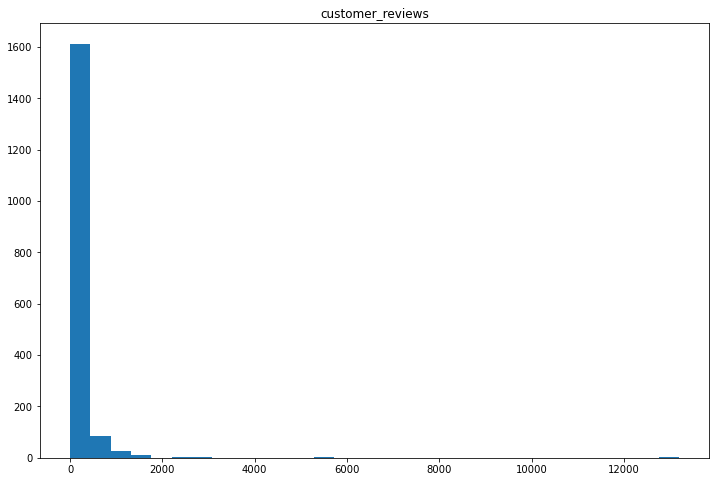

In [17]:
rec_df.hist(column='customer_reviews', bins=30, grid=False, figsize=(12,8))

In [18]:
pop_books = rec_df.loc[rec_df['customer_reviews'] >4000]

In [19]:
pop_books

,title,author,description,publisher,customer_reviews,stars
10,Insurgent (Divergent Series) [Kindle Edition],Veronica Roth,One choice can transform you—or it can destroy...,Katherine Tegen Books,5699.0,4.6
14,The Perks of Being a Wallflower [Kindle Edition],Stephen Chbosky,Standing on the fringes of life offers a uniqu...,MTV Books,5540.0,4.5
41,Catching Fire (The Second Book of the Hunger G...,Suzanne Collins,"Against all odds, Katniss Everdeen has won the...",Scholastic Press,13191.0,4.6
90,World War Z: An Oral History of the Zombie War...,Max Brooks,“The end was near.” —Voices from the Zombie Wa...,Crown,4033.0,4.2
99,Catching Fire: Movie Tie-in Edition: The Secon...,Suzanne Collins,"Catching Fire, the second book in the New York...",Scholastic Paperbacks; Mti edition,13191.0,4.6
1048,"Twilight (The Twilight Saga, Book 1) [Kindle E...",Stephenie Meyer,The #1 New York Times bestseller is available ...,"Little, Brown Books for Young Readers; 1st edi...",6366.0,4.1


array([[<AxesSubplot:title={'center':'stars'}>]], dtype=object)

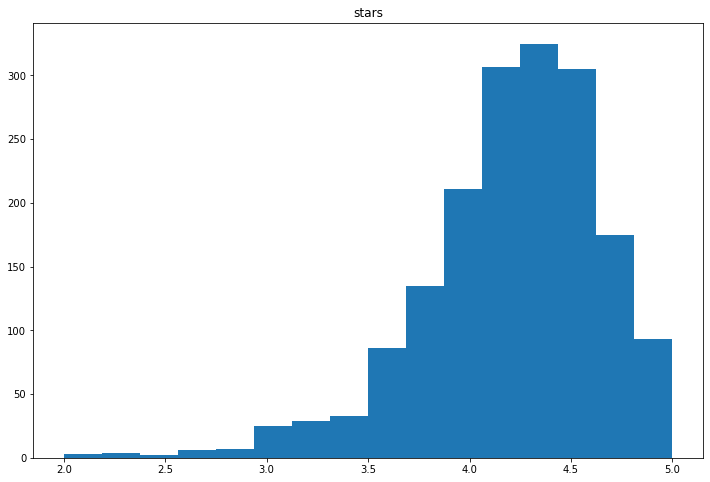

In [20]:
rec_df.hist(column='stars', bins=16, grid=False, figsize=(12,8))

In [21]:
df = pd.read_csv('../data/book_data18.csv')

In [22]:
df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Kristin Hannah,"Alaska, 1974.Unpredictable. Unforgiving. Untam...",NaN,Kindle Edition,NaN,435 pages,4.33,146505,17438,The Great Alone,Fiction|Historical|Historical Fiction|Audioboo...,https://images.gr-assets.com/books/1501852423l...
1,Madeline Miller,"In the house of Helios, god of the sun and mig...",NaN,Hardcover,9.780000e+12,393 pages,4.34,61357,9369,Circe,Fantasy|Fiction|Fantasy|Mythology|Historical|H...,https://images.gr-assets.com/books/1508879575l...
2,Holly Black,Of course I want to be like them. They’re beau...,NaN,Hardcover,9.780000e+12,370 pages,4.18,62897,11948,The Cruel Prince,Fantasy|Young Adult|Fairies|Fae,https://images.gr-assets.com/books/1493047153l...
3,A.J. Finn,Anna Fox lives alone—a recluse in her New York...,NaN,Kindle Edition,NaN,449 pages,3.97,175678,20645,The Woman in the Window,Mystery|Thriller|Fiction|Suspense|Thriller|Mys...,https://images.gr-assets.com/books/1528225499l...
4,Tara Westover,An unforgettable memoir in the tradition of Th...,NaN,Hardcover,9.780000e+12,334 pages,4.47,128337,16424,Educated,Nonfiction|Autobiography|Memoir|Biography,https://images.gr-assets.com/books/1506026635l...


In [23]:
df = df[df['genres'].notna()]

In [24]:
gr_horror_books = df.loc[df['genres'].str.contains("Horror", case=False)]

In [25]:
gr_horror_books.shape

(35, 12)

In [26]:
gr_horror_books

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
12,Stephen King,An unspeakable crime. A confounding investigat...,NaN,Hardcover,9.780000e+12,561 pages,4.07,65894,7893,The Outsider,Horror|Fiction|Mystery|Thriller|Mystery|Crime|...,https://images.gr-assets.com/books/1524596540l...
74,Zoje Stage,\r\r\nSweetness can be deceptive. \r\r\nMeet H...,NaN,Hardcover,9.780000e+12,304 pages,3.68,14000,3782,Baby Teeth,Fiction|Thriller|Horror|Mystery|Thriller|Myste...,https://images.gr-assets.com/books/1528990927l...
85,Derek Milman,A darkly hilarious contemporary realistic youn...,NaN,Kindle Edition,NaN,400 pages,3.80,710,249,Scream All Night,Young Adult|Horror|Contemporary|Holiday|Halloween,https://images.gr-assets.com/books/1508174629l...
104,Guillermo del Toro|Daniel Kraus,"It is 1962, and Elisa Esposito—mute her whole ...",NaN,Hardcover,9.780000e+12,315 pages,3.97,7999,1280,The Shape of Water,Fantasy|Romance|Fiction|Historical|Historical ...,https://images.gr-assets.com/books/1509709054l...
179,Rebecca Schaeffer,Dexter meets This Savage Song in this dark fan...,NaN,ebook,NaN,368 pages,4.06,1113,357,Not Even Bones,Fantasy|Young Adult|Fantasy|Paranormal|Horror|...,https://images.gr-assets.com/books/1523768993l...
185,Michael Rutger|Michael Marshall,Not all secrets are meant to be found.If India...,NaN,Hardcover,9.780000e+12,352 pages,3.83,4054,793,The Anomaly,Horror|Fiction|Thriller|Science Fiction|Myster...,https://images.gr-assets.com/books/1508879817l...
335,Ezekiel Boone,In the finale of Ezekiel Boone’s Hatching seri...,NaN,Kindle Edition,NaN,336 pages,3.69,1033,231,Zero Day,Horror|Thriller|Fiction|Science Fiction,https://images.gr-assets.com/books/1502793351l...
337,Marjorie M. Liu|Sana Takeda,Maika has spent most of her life learning how ...,NaN,Paperback,9.780000e+12,168 pages,4.27,2460,374,"Monstress, Vol. 3: Haven",Sequential Art|Graphic Novels|Fantasy|Sequenti...,https://images.gr-assets.com/books/1531356957l...
341,John Connolly,From internationally bestselling author and “c...,NaN,Kindle Edition,NaN,496 pages,4.26,3172,390,The Woman in the Woods,Mystery|Horror|Thriller|Fiction|Mystery|Crime,https://images.gr-assets.com/books/1514488765l...
371,Quil Carter,Two months after what is now known as ‘The Pro...,NaN,Kindle Edition,NaN,690 pages,4.67,139,21,A God Among Insects Volume 1,Romance|M M Romance|Apocalyptic|Post Apocalypt...,https://images.gr-assets.com/books/1521425532l...
